In [39]:
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (
    roc_curve,
    confusion_matrix,
    accuracy_score,
    matthews_corrcoef,
    roc_auc_score,
    log_loss
)

In [2]:
def roc_cutoff(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    cutoff = thresholds[np.argmax(tpr - fpr)]
    return cutoff


def evaluate_clf(y_true, y_pred, cutoff):
    pred_label = (y_pred >= cutoff) * 1
    tn, fp, fn, tp = confusion_matrix(y_true, pred_label).ravel()
    accuracy = accuracy_score(y_true, pred_label)
    balanced_accuracy = (tp / (tp + fn) + tn / (tn + fp)) / 2
    mcc = matthews_corrcoef(y_true, pred_label)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_true, y_pred)
    metrics = {
        'auc': [auc],
        'acc': [accuracy],
        'sen': [sensitivity],
        'spe': [specificity],
        'bac': [balanced_accuracy],
        'mcc': [mcc],
        'cutoff': [cutoff]
    }
    return metrics

In [3]:
cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']

In [31]:
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1400)
tr_idx, te_idx = list(skf.split(X,y))[0]
X_train, y_train = X[tr_idx], y[tr_idx]
X_test, y_test = X[te_idx], y[te_idx]

clf = SVC(
    C=1.5,
    gamma=0.5,
    kernel='rbf'
)
clf.fit(X,y)

SVC(C=1.5, gamma=0.5)

In [45]:
scaler = MinMaxScaler()
y_pred_te = scaler.fit_transform(clf.decision_function(X_test).reshape(-1,1)).flatten()
cutoff = roc_cutoff(y[tr_idx], clf.decision_function(X[tr_idx]))

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

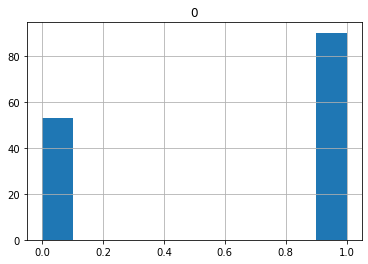

In [49]:
import pandas as pd
pd.DataFrame(y_pred_te).hist()


In [50]:
log_loss(y[te_idx], y_pred_te)

0.00027608813670793557

In [38]:
y_pred_te + np.abs(np.min(y_pred_te))

array([3.19474811e-06, 2.26035845e-06, 1.12859801e-06, 9.27249136e-07,
       1.83648828e-07, 9.23659379e-07, 2.04424899e-09, 4.55977522e-09,
       2.00000427e+00, 1.83644580e-07, 1.83648824e-07, 2.06045869e-09,
       4.11277453e-07, 4.72191597e-09, 4.72191597e-09, 0.00000000e+00,
       1.12858383e-06, 1.12858382e-06, 2.00000252e+00, 2.00097571e+00,
       2.00097571e+00, 1.12437172e-06, 2.00097571e+00, 1.12859801e-06,
       1.12859801e-06, 2.00000093e+00, 1.12859060e-06, 2.00097571e+00,
       1.32584823e-06, 2.00097571e+00, 2.00000520e+00, 2.26035564e-06,
       2.00000427e+00, 2.52586419e-06, 2.00000427e+00, 2.00000093e+00,
       2.52585860e-06, 2.00000092e+00, 2.52585911e-06, 4.26842220e-06,
       2.00000253e+00, 3.19331142e-06, 3.19360863e-06, 2.00000153e+00,
       2.00000226e+00, 2.00000133e+00, 2.00000113e+00, 2.00000113e+00,
       2.00000113e+00, 2.04415773e-09, 2.00000092e+00, 2.00000093e+00,
       2.00000082e+00, 2.00000000e+00, 1.84709267e-07, 4.72191597e-09,
      

In [34]:
y_pred_te

array([-1.00004809, -1.00004903, -1.00005016, -1.00005036, -1.00005111,
       -1.00005037, -1.00005129, -1.00005129,  0.99995298, -1.00005111,
       -1.00005111, -1.00005129, -1.00005088, -1.00005128, -1.00005128,
       -1.00005129, -1.00005016, -1.00005016,  0.99995123,  1.00092442,
        1.00092442, -1.00005017,  1.00092442, -1.00005016, -1.00005016,
        0.99994964, -1.00005016,  1.00092442, -1.00004996,  1.00092442,
        0.99995391, -1.00004903,  0.99995298, -1.00004876,  0.99995298,
        0.99994964, -1.00004876,  0.99994964, -1.00004876, -1.00004702,
        0.99995124, -1.0000481 , -1.0000481 ,  0.99995024,  0.99995097,
        0.99995004,  0.99994984,  0.99994984,  0.99994984, -1.00005129,
        0.99994964,  0.99994964,  0.99994953,  0.99994871, -1.0000511 ,
       -1.00005128, -1.00005128,  0.99994871,  0.99994872, -1.00005111,
        0.99994889,  0.99994889,  0.99994889, -1.00005111, -1.00005111,
        0.99994964,  0.99994964,  0.99994964,  0.99994984, -1.00

In [29]:
accuracy_score(y[te_idx], (y_pred_te>0)*1)

0.6293706293706294

In [19]:
y_pred_te

array([-1.00004809, -1.00004903, -1.00005016, -1.00005036, -1.00005111,
       -1.00005037, -1.00005129, -1.00005129,  0.99995298, -1.00005111,
       -1.00005111, -1.00005129, -1.00005088, -1.00005128, -1.00005128,
       -1.00005129, -1.00005016, -1.00005016,  0.99995123,  1.00092442,
        1.00092442, -1.00005017,  1.00092442, -1.00005016, -1.00005016,
        0.99994964, -1.00005016,  1.00092442, -1.00004996,  1.00092442,
        0.99995391, -1.00004903,  0.99995298, -1.00004876,  0.99995298,
        0.99994964, -1.00004876,  0.99994964, -1.00004876, -1.00004702,
        0.99995124, -1.0000481 , -1.0000481 ,  0.99995024,  0.99995097,
        0.99995004,  0.99994984,  0.99994984,  0.99994984, -1.00005129,
        0.99994964,  0.99994964,  0.99994953,  0.99994871, -1.0000511 ,
       -1.00005128, -1.00005128,  0.99994871,  0.99994872, -1.00005111,
        0.99994889,  0.99994889,  0.99994889, -1.00005111, -1.00005111,
        0.99994964,  0.99994964,  0.99994964,  0.99994984, -1.00

In [12]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])